<!-- dom:TITLE: Numerical integration: Part II -->
# Numerical integration: Part II
<!-- dom:AUTHOR: Anne Kværnø, André Massing -->
<!-- Author: -->  
**Anne Kværnø, André Massing**

Date: **Jan 28, 2021**

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
from numpy import pi


def css_styling():
    try:
        with open("tma4125.css") as f:
            styles = f.read()
            return HTML(styles)
    except FileNotFoundError:
        pass  # Do nothing


# Comment out next line and execute this cell to restore the default notebook style
css_styling()

As usual, we import the necessary modules before we get started.

In [10]:
%matplotlib inline

newparams = {
    "figure.figsize": (8.0, 4.0),
    "axes.grid": True,
    "lines.markersize": 8,
    "lines.linewidth": 2,
    "font.size": 14,
}
plt.rcParams.update(newparams)

# General construction of quadrature rules
In the following, you will learn the steps on how to construct realistic
algorithms for numerical integration, similar to those used in software like
Matlab of SciPy.  The steps are:

**Construction.**

1. Choose $n+1$ distinct nodes on a standard interval $I$, often chosen to be $I=[-1,1]$. 

2. Let $p_n(x)$ be the polynomial interpolating some general function $f$ in the nodes, and let the  $Q[f](-1,1)=I[p_n](-1,1)$.  

3. Transfer the formula $Q$ from $[-1,1]$ to some interval $[a,b]$.

4. Design a composite formula, by dividing the interval $[a,b]$ into
  subintervals and applying the quadrature formula on each subinterval.

5. Find an expression for the error $E[f](a,b) = I[f](a,b)-Q[f](a,b)$. 

6. Find an expression for an estimate of the error, and use this to create an adaptive algorithm.


In this course, we will not have the time to cover the last two steps.

# Constructing quadrature rules on a single interval

We have already seen in the previous Lecture how quadrature rules
on a given interval $[a,b]$ can be constructed using polynomial
interpolation.

For $n+1$ quadrature points $\{x_i\}_{i=0}^n \subset [a,b]$,
we compute weights by

$$
w_i =\int_a^b \ell_i(x) {\,\mathrm{d}x} \quad \text{for } i = 0, \ldots, n.
$$

where $\ell_i(x)$ are the cardinal functions associated with
$\{x_i\}_{i=0}^n$ satisfying $\ell_i(x_j) = \delta_{ij}$ for
$i,j = 0,1,\ldots, n$.
The resulting quadrature rule has (at least) degree of exactness
equal to $n$.

But how to you proceed if you know want to
compute an integral on a different interval, say
$[c,d]$?
Do we have to reconstruct all the cardinal functions and recompute
the weights?

The answer is NO! One can easily transfer quadrature points and weights
from one interval to another.
One typically choose the simple **reference interval** $\widehat{I} = [-1, 1]$.
Then you determine some $n+1$ quadrature points
$\{\widehat{x}_i\}_{i=0}^n \subset [-1,1]$ and quadrature weights
$\{\widehat{w}_i\}_{i=0}^n$ to define a quadrature rule $Q(\widehat{I})$

The quadrature points can then be transferred to an arbitrary interval
$[a,b]$ to define a quadrature rule $Q(a,b)$ using the transformation

$$
x = \frac{b-a}{2}\widehat{x} + \frac{b+a}{2}, \quad  \text{so} \quad {\,\mathrm{d}x} = \frac{b-a}{2}\,\mathrm{d}\widehat{x},
$$

and thus we define
$\{x_i\}_{i=0}^n$
and
$\{w_i\}_{i=0}^n$ by

$$
x_i = \frac{b-a}{2}\widehat{x}_i + \frac{b+a}{2}, \quad  w_i = \frac{b-a}{2}\widehat{w}_i
\quad \text{for } i = 0, \ldots n.
$$

## Example 1: Simpson's rule

* Choose standard interval $\left[-1,1\right]$. For Simpson's rule, choose the
  nodes $t_{0}=-1$, $t_{1}=0$ and $t_{2}=1$. The corresponding cardinal functions are

  * $\displaystyle\ell_{0}=\frac{1}{2}\left(t^{2}-t\right),\qquad\ell_{1}\left(t\right)=1-t^{2},\qquad\ell_{2}\left(t\right)=\frac{1}{2}\left(t^{2}+t\right)$.

  which gives the weights

  * $\displaystyle
    w_{0}=\int_{-1}^{1}\ell_{0}\left(t\right)\mathrm{d}t=\frac{1}{3},\qquad
    w_{1}=\int_{-1}^{1}\ell_{1}\left(t\right)\mathrm{d}t=\frac{4}{3},\qquad
    w_{2}=\int_{-1}^{1}\ell_{2}\left(t\right)\mathrm{d}t=\frac{1}{3}$

  such that

  * $\displaystyle\int_{-1}^{1}f\left(t\right)\mathrm{d}t\approx\int_{-1}^{1}p_{2}\left(t\right)\mathrm{d}t=\sum_{i=0}^{2}w_{i}f\left(t_{i}\right)=\frac{1}{3}\left[f\left(-1\right)+4f\left(0\right)+f\left(1\right)\right]$. 


* After transferring the nodes and weights,
  Simpson's rule over the interval $[a,b]$ becomes

  * $\displaystyle S\left(a,b\right)=\frac{b-a}{6}\left[f\left(a\right)+4f\left(c\right)+f\left(b\right)\right],\qquad c=\frac{b+a}{2}$.

# Composite quadrature rules
To generate more accurate quadrature rule $Q(a,b)$
we have in principle two possibilities:
* Increase the order of the interpolation polynomial used to construct the quadrature rule.

* Subdivide the interval $[a,b]$ into smaller subintervals and apply a quadrature rule on each of
  the subintervals, leading to **Composite Quadrature Rules** which we will consider next.
  

Select $m\geqslant 2$ and divide $\left[a,b\right]$ into $m$ equally spaced
subintervals $\left[x_{i-1},x_{i}\right]$ defined by $x_{i}=a+ih$ with $h=\left(b-a\right)/m$ for $i=1,\ldots,m$.
Then for a given quadrature rule $\mathrm{Q}[\cdot](x_{i-1},x_i)$ the corresponding
composite quadrature rule $\mathrm{CQ}[\cdot]({[x_{i-1}, x_{i}]}_{i=1}^{m})$ is given by

$$
\begin{equation}
\int_{a}^{b}f{\mathrm{d}x}\approx
\mathrm{CQ}[f]({[x_{i-1}, x_{i}]}_{i=1}^{m})=
\sum_{i=1}^{m}
\mathrm{Q}\left[f\right]\left(x_{i-1},x_{i}\right).
\tag{1}
\end{equation}
$$

## Composite trapezoidal rule

Using the trapezoidal rule $\mathrm{T}[f](x_{i-1},x_{i})=\tfrac{h}{2} f(x_{i-1}) + \tfrac{h}{2} f(x_{i})$
the resulting composite trapezoidal rule is given by

$$
\begin{align*}
\int_a^b f {\,\mathrm{d}x} \approx \mathrm{CT}[f]({[x_{i-1}, x_{i}]}_{i=1}^{m})
= h \left[ \tfrac{1}{2} f(x_0) + f(x_1) + \ldots + f(x_{m-1}) + \tfrac{1}{2} f(x_m) \right]
\end{align*}
$$

<!-- --- begin exercise --- -->

## Exercise 1: Testing the accuracy of the composite trapezoidal rule
<div id="quad:ex:ctr"></div>

Have a look at the `CT` function which implements the composite trapezoidal rule:

In [11]:
def CT(f, a, b, m):
    """Computes an approximation of the integral f
    using the composite trapezoidal rule.
    Input:
        f:  integrand
        a:  left interval endpoint
        b:  right interval endpoint
        m:  number of subintervals
    """
    x = np.linspace(a, b, m + 1)
    h = float(b - a) / m
    fx = f(x[1:-1])
    ct = h * (np.sum(fx) + 0.5 * (f(x[0]) + f(x[-1])))
    return ct

Use this function to compute an approximate value of integral

$$
I(0,1) = \int_0^1 \cos\left(\frac{\pi}{2}x\right) = \frac{2}{\pi} = 0.636619\dotsc.
$$

for $m = 4, 8, 16, 32, 64$ corresponding to
$ h = 2^{-2}, 2^{-3}, 2^{-4}, 2^{-5}, 2^{-6}$.
Tabulate the corresponding quadrature errors $I(0,1) - Q(0,1)$.
What do you observe?

In [12]:
# Insert your code here.

<!-- --- begin solution of exercise --- -->
**Solution.**

In [13]:
# Define function


def f(x):
    return np.cos(pi * x / 2)


# Exact integral
int_f = 2 / pi

# Interval
a, b = 0, 1

# Compute integral numerically
for m in [4, 8, 16, 32, 64]:
    cqr_f = CT(f, a, b, m)
    print(f"Number of subintervals m = {m}")
    print(f"Q[f] = {cqr_f}")
    print(f"I[f] - Q[f] = {int_f - cqr_f:.10e}")

Number of subintervals m = 4
Q[f] = 0.6284174365157311
I[f] - Q[f] = 8.2023358519e-03
Number of subintervals m = 8
Q[f] = 0.6345731492255537
I[f] - Q[f] = 2.0466231420e-03
Number of subintervals m = 16
Q[f] = 0.6361083632808496
I[f] - Q[f] = 5.1140908673e-04
Number of subintervals m = 32
Q[f] = 0.6364919355013015
I[f] - Q[f] = 1.2783686628e-04
Number of subintervals m = 64
Q[f] = 0.636587814113642
I[f] - Q[f] = 3.1958253939e-05


<!-- --- end solution of exercise --- -->

<!-- Closing remarks for this Exercise -->

### Remarks

We observe that for each *doubling* of the number of subintervals
we decrease the error by a *fourth*.
That means that if we look at
the quadrature error $I[f]-\mathrm{CT}[f]$
as a function of the number of subintervals $m$
(or equivalently as a function of $h$),
then
$|I[f]-\mathrm{CT}[f]| \approx \tfrac{C}{m^2} = C h^2$.


<!-- --- end exercise --- -->

## Error estimate for the composite trapezoidal rule
We will now theoretically explain the experimentally observed
convergence rate in the previous [Exercise 1: Testing the accuracy of the composite trapezoidal rule](#quad:ex:ctr).

First we have to recall the error estimate for
for the trapezoidal rule on a single interval $[a,b]$.
If $f\in C^2(a,b)$, then there is a $\xi \in (a,b)$ such that

$$
I[f]-\mathrm{T}[f]=\frac{(b-a)^3}{12}f''(\xi).
$$

## Theorem 1: Quadrature error estimate for composite trapezoidal rule

Let $f\in C^2(a,b)$, then
the quadrature error $I[f]-\mathrm{CT}[f]$
for the composite trapezoidal rule can be estimated by

$$
\begin{equation}
|I[f]-\mathrm{CT}[f]|
\leqslant
\dfrac{M_2}{12} \dfrac{(b-a)^3}{m^2}
=
\dfrac{M_2}{12}
h^2(b-a)
\tag{2}
\end{equation}
$$

where  $M_2 = \max_{\xi\in[a,b]} |f''(\xi)|$.

**Proof.**

$$
\begin{align*}
|I[f]-\mathrm{CT}[f]|
&=
\biggl \lvert
\sum_{i=1}^m
\Bigl [
\int_{x_{i-1}}^{x_i} f(x) {\,\mathrm{d}x}
- \bigl(
\tfrac{h}{2}f(x_{i-1})
+
\tfrac{h}{2}f(x_{i})
\bigr)
\Bigr]
\biggr \rvert
\\ 
&\leqslant
\sum_{i=1}^m
\frac{h^3}{12}|f''(\xi_i)|
\leqslant 
M_2 \sum_{i=1}^m
\frac{(h)^3}{12}
\\ 
&=
M_2 
\frac{h^3}{12}
\underbrace{m}_{\tfrac{(b-a)}{h}}
=
\dfrac{M_2}{12}
h^2(b-a)
=
\frac{M_2}{12}
\frac{(b-a)^3}{m^2}
\end{align*}.
$$

## Interlude: Convergence of $h$-dependent approximations

Let $X$ be the exact solution, and $X(h)$ some numerical solution depending on a
parameter $h$, and let $e(h)$ be the norm of the error, so $e(h)=\|X-X(h)\|$. The numerical approximation $X(h)$ converges to $X$ if $e(h) \rightarrow 0$ as $h\rightarrow 0$. 
The order of the approximation is $p$ if there exists a positive constant $M$ such that
$$
e(h) \leq M h^p
$$

The Big $\mathcal{O}$-notation we can simply write
$$
e(h) = \mathcal{O}(h^p)
\qquad\text{ as } h \to 0.
$$
This is often used when we are not directly interested in any expression for the constant $M$, we only need to know it exists.

Again, we see that a higher approximation order $p$ leads for small values of $h$ to a better approximation of the solution. Thus we are generally interested in approximations of higher order.

### Numerical verification

The following is based on the assumption that  $e(h)\approx C h^p$ for some
unknown constant $C$. This assumption is often reasonable for sufficiently
small $h$. 

Choose a test problem for which the exact solution is known and compute the
error for a decreasing sequence of $h_k$'s, for instance $h_k=H/2^k$,
$k=0,1,2,\dots$. The procedure is then quite similar to what was done for
iterative processes.

$$
\begin{array}{rcl} e(h_{k+1}) &\approx& C h_{k+1}^p \\  e(h_k) &\approx& C h_k^p \end{array}
  \qquad \Rightarrow \qquad 
  \frac{e(h_{k+1})}{e(h_k)} \approx \left( \frac{h_{k+1}}{h_k} \right)^p 
  \qquad \Rightarrow \qquad 
  p \approx \frac{\log{(e(h_{k+1})/e(h_k))}}{\log{(h_{k+1}/h_k)}}
$$

For one refinement step where one passes from $h_k \to h_{k+1}$, the number
$$
EOC(k) \approx \frac{\log{(e(h_{k+1})/e(h_k))}}{\log{(h_{k+1}/h_k)}}
$$
is often called the "Experimental order of convergence at refinement level k"

Since
$$
e(h) \approx Ch^p \qquad \Rightarrow \qquad \log{e(h)} \approx \log{C} + p \log{h}
$$
a plot of $e(h)$ as a function of $h$ using a logarithmic scale on both axes (a log-log plot)
will be a straight line with slope $p$. Such a plot is referred to as
an *error plot* or a *convergence plot*.

## Exercise 1 (extension): Examine the convergence order of composite trapezoidal rule

In [14]:
# Insert your code here.

**Solution**

Number of subintervals m = 4
Q[f] = 0.6284174365157311
I[f] - Q[f] = 8.2023358519e-03
Number of subintervals m = 8
Q[f] = 0.6345731492255537
I[f] - Q[f] = 2.0466231420e-03
Number of subintervals m = 16
Q[f] = 0.6361083632808496
I[f] - Q[f] = 5.1140908673e-04
Number of subintervals m = 32
Q[f] = 0.6364919355013015
I[f] - Q[f] = 1.2783686628e-04
Number of subintervals m = 64
Q[f] = 0.636587814113642
I[f] - Q[f] = 3.1958253939e-05
[2.00278934 2.00069577 2.00017385 2.00004346]


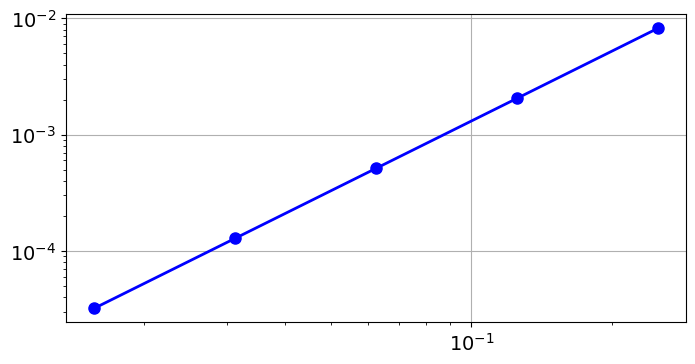

In [15]:
# Define function


def f(x):
    return np.cos(pi * x / 2)


# Exact integral
int_f = 2 / pi

# Interval
a, b = 0, 1

errs = []
hs = []

# Compute integral numerically
for m in [4, 8, 16, 32, 64]:
    cqr_f = CT(f, a, b, m)
    print(f"Number of subintervals m = {m}")
    print(f"Q[f] = {cqr_f}")
    err = int_f - cqr_f
    errs.append(err)
    hs.append((b - a) / m)
    print(f"I[f] - Q[f] = {err:.10e}")

hs = np.array(hs)
errs = np.array(errs)
eoc = np.log(errs[1:] / errs[:-1]) / np.log(hs[1:] / hs[:-1])
print(eoc)
plt.loglog(hs, errs, "bo-")

<!-- --- begin exercise --- -->

## Exercise 2: Composite Simpson's rule

We can now play the exact same game to construct
and analyze a **Composite Simpson's rule**.
In this set of exercises you are ask to develop the code
and theory for the composite Simpson's rule.
*This will be part of the next homework assignment.*

**a)**
Start from Simpson's rule

$$
\mathrm{S}[f](x_{i-1},x_i)=\frac{h}{6}\left( f(x_{x_{i-1}})+4f(x_{i-1/2}) + f(x_i)\right),
$$

where $x_{i-1/2} = \frac{x_{i-1}+x_i}{2}$ is the midpoint of the interval $[x_{i-1},x_i]$.

Show that the resulting composite Simpson's rule is given by

$$
\begin{align*}
\int_a^b f {\,\mathrm{d}x} \approx \mathrm{CSR}[f]({[x_i, x_{i+1}]}_{i=1}^{m})
&= 
\tfrac{h}{6}
[
f(x_0)
+ 4f(x_{x_{1/2}}) + 2f(x_1) 
+ 4f(x_{3/2}) +     2f(x_2)
+ \ldots
\\ 
&\qquad+2 f(x_{m-1})
+
4f(x_{x_{m-1/2}}) 
+f(x_m)
].
\end{align*}
$$

**b)**
Implement the composite Simpson's rule.
Use this function to compute an approximate value of integral

$$
I(0,1) = \int_0^1 \cos\left(\frac{\pi}{2}x\right) = \frac{2}{\pi} = 0.636619\dotsc.
$$

for $m = 4, 8, 16, 32, 64$ corresponding to
$ h = 2^{-2}, 2^{-3}, 2^{-4}, 2^{-5}, 2^{-6}$.
Tabulate the corresponding quadrature errors $I(0,1) - Q(0,1)$.
What do you observe? How does it compare to the composite trapezoidal rule?

In [16]:
# Insert your code here.

**c)**
Recall the error estimate for Simpson's rule on a *single
interval*, stating that 
there is a $\xi \in (a,b)$ such that

$$
I[f]-Q[f]=-\frac{(b-a)^5}{2880} f^4(\xi).
$$
whenever $f \in C^4(a,b)$. Start from
this estimate and prove the following theorem.
<!-- --- end exercise --- -->

## Theorem 2: Quadrature error estimate for composite Simpon's rule

Let $f\in C^4(a,b)$, then
the quadrature error $I[f]-\mathrm{CT}[f]$
for the composite trapezoidal rule can be estimated by

$$
\begin{equation}
\left|I[f]-\mathrm{CSR}[f]\right|
\leq
\dfrac{M_4}{2880}
\dfrac{(b-a)^5}{m^4}=
\dfrac{M_4}{2880}
h^4(b-a)
\tag{3}
\end{equation}
$$

where $M_{4}=\max_{\xi\in[a,b]}|f^{(4)}(\xi)|$.

**Proof.**

*Insert your proof here.*